### Aula 1

In [2]:
import pandas as pd
url_dados = "https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true"
dados = pd.read_csv(url_dados, compression='zip')
# dados.head(3)
# dados.info()
# dados.shape
# dados.tail(3)
# dados[-5:] # retorna a mesma coisa que tail(5)

In [3]:
# Valors únicos
# dados["tratamento"].unique()
dados["tratamento"].value_counts(normalize=True).map("{:.1%}".format)
# dados["tratamento"].value_counts(normalize=True).plot.bar()


com_droga       92.2%
com_controle     7.8%
Name: tratamento, dtype: object

In [4]:
dados["tempo"].unique()
dados["tempo"].value_counts()
# dados["tempo"].value_counts().plot.bar()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [5]:
dados["dose"].unique()
dados["dose"].value_counts()
dados["dose"].describe()

count     23814
unique        2
top          D1
freq      12147
Name: dose, dtype: object

In [6]:
# dados["droga"].values
# dados["droga"].unique()
# dados["droga"].value_counts()
# dados["droga"].describe()
dados["droga"].unique().shape[0] # por padrão retorna linhas e colunas para retornar apenas linhas shape[0]


3289

In [7]:
# g é abreviação de gene. representa a expressão desse gene
dados["g-0"].unique()

# Quais são as linhas acima de Zero?
dados_filtrados = dados.loc[dados["g-0"] > 0]
dados_filtrados.head(3)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931


### Desafios aula 1
#### Investigar por que a classe tratamento é tão desbalanceada?
- Dependendo o tipo de pesquisa é possível usar o mesmo controle para mais de um caso. Repare que o grupo de controle é um grupo onde não estamos aplicando o efeito de uma determinada droga. Então, esse mesmo grupo pode ser utilizado como controle para cada uma das drogas estudadas.


In [8]:
# método query https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

print("Total de dados: {0}".format(len(dados["id"])))
print("Quantidade de drogas {0}".format(len(dados.groupby(["droga", "tratamento"]).count()["id"])))

# Filtrar apenas as linhas com o tratamento "com_controle" e contar quantas linhas existe para cada tipo de droga
# Descobrimos que existe apenas um tipo de droga para o grupo controle "placebo"
display(dados.query('tratamento == "com_controle"').value_counts('droga'))

Total de dados: 23814
Quantidade de drogas 3289


droga
cacb2b860    1866
dtype: int64

In [9]:
# Renomeando todas as colunas que tem hifen no nome
nome_colunas = dados.columns

# Iterando nas colunas e alterando o nome
novo_nome_coluna = []
""""
for coluna in nome_colunas:
    coluna = coluna.replace('-', '_')
    novo_nome_coluna.append(coluna)
"""
# Usando list comprerension
novo_nome_coluna = [coluna.replace("-", "_") for coluna in nome_colunas] # if coluna.count("-") > 0]

# display(novo_nome_coluna)
# display(dados.columns)
dados.columns = novo_nome_coluna
dados.head()


,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [10]:
# Comparando formas de filtragem
dados_filtrados = dados[dados['g_0'] > 0]
dados_filtrados.head()

dados_filtrados2 = dados.query('g_0 > 0')
dados_filtrados2.head()

,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


### Aula 2

In [11]:
# modificar o nome da coluna Droga (droga na verdade é composto quimico e não um remedio específico)

# Renomeando Coluna "Composto"
mapa = {"droga": "composto"}

# inplace = true substitui o nome da coluna, se não o nome se mantém
# tem que trocar todo os códigos das etapas anteriores precisam ser alterados se for usado inplace
dados.rename(columns=mapa, inplace=True)

In [12]:
# Selecionando os Top 5 elementos (somente os códigos)
dados_top5_compostos = dados["composto"].value_counts().index[0:5]

# Filtrando o dataframe usando a lista de códigos dos top 5 compostos
# compostos = dados_top5_compostos.index
# o @ arroba identifica que é uma lista criada internamente
dados.query("composto in @dados_top5_compostos") 


,id,tratamento,tempo,dose,composto,g_0,g_1,g_2,g_3,g_4,...,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,...,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,...,1.2470,0.9569,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082
23802,id_fff3976bd,com_droga,24,D1,87d714366,3.2890,2.1270,0.9770,2.0490,2.3170,...,-8.6300,-8.1490,-6.2900,-8.0970,-8.7330,-2.3780,-8.4480,-4.4550,-5.7930,-3.7000
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,...,0.2865,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808


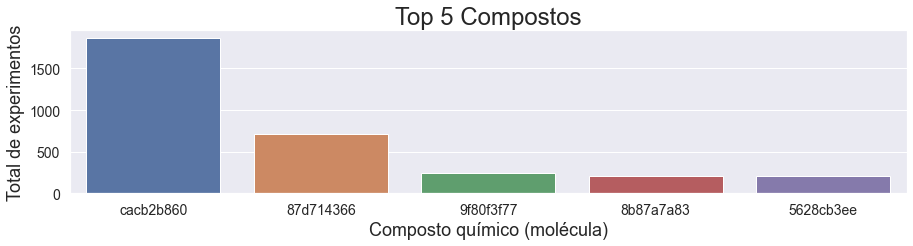

In [79]:
# dados.head()
import seaborn as sns
import matplotlib.pyplot as plt

# preconfigura os graficos do seaborn
sns.set()
plt.rc("axes", titlesize=24)
plt.rc("axes", labelsize=18)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.figure(figsize=(15, 3))

ax = sns.countplot(
         x="composto", 
         data=dados.query("composto in @dados_top5_compostos"),
         order=dados_top5_compostos
     )      
ax.set_title("Top 5 Compostos")
ax.set_ylabel("Total de experimentos")
ax.set_xlabel("Composto químico (molécula)")
plt.show()

In [14]:
# quantos elementos únicos tem a coluna g-0?
len(dados["g_0"].unique())

14367

In [15]:
dados["g_0"].min()
dados["g_0"].max()

# conjunto de estatísticas da tabela ou de uma coluna específica
# dados.describe()

10.0

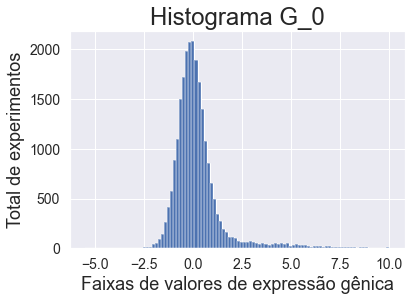

In [82]:
# apresentar em um histograma com 100 faixas de valores no eixo X

# Versão do gráfico usando versão padrão do pandas
dados["g_0"].hist(bins=100)

# Versão usando seaborn
ax = sns.histplot(data=dados["g_0"], bins=100)
ax.set_title("Histograma G_0")
ax.set_ylabel("Total de experimentos")
ax.set_xlabel("Faixas de valores de expressão gênica")
plt.show()

<AxesSubplot:>

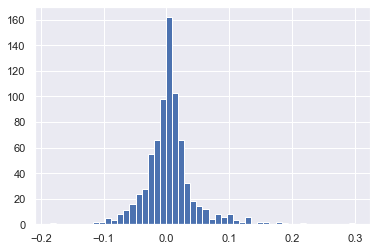

In [17]:
# dados[["g_0", "g_1", "g_2"]].describe()
# dados["g_0"].describe()
# a distribuição está parecendeo uma curva normal

# todas as linhas com todas as colunas a partir da g_0 até g_771
# usar T no final transforma linhas em colunas
dados_hist = dados.loc[:,'g_0':'g_771'].describe().T

# plotar histograma com as médias de todas as colunas
# dados_hist["mean"].hist(bins=50)

# plotar histograma com as medianas de todas as colunas
dados_hist["50%"].hist(bins=50)

<AxesSubplot:>

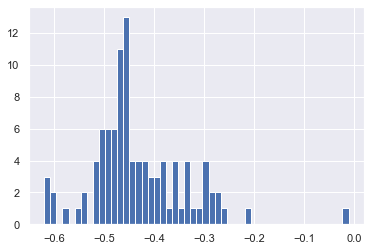

In [18]:
# todas as linhas com todas as colunas a partir da c_0 até c_99 (tipos celulares)
# usar T no final transforma linhas em colunas
dados.loc[:,'c_0':'c_99'].describe().T['mean'].hist(bins=50)


<AxesSubplot:xlabel='g_0'>

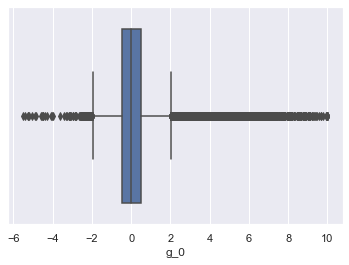

In [19]:
# metade estão acima de zero e outra metade abaixo de zero
# a caixa azul representa a mediana e o primeiro quartil a direita e o 1 quartil a esquerda. Representa 50% dos casos
# os pontos do lado de fora são os outliers (fojem do padrão)
# o traço externo representa os outros 25% de cada lado
sns.boxplot(x="g_0", data=dados)

<AxesSubplot:xlabel='g_100', ylabel='tratamento'>

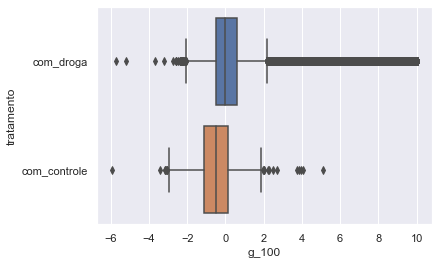

In [20]:
sns.boxplot(x="g_100", y="tratamento", data=dados)

## Desafios

In [ ]:
# Melhorar a visualização do gráfico


## Aula 3 - Corelações e causalidade

In [34]:
# Relacionando os tipos de tratamento, tempo, dose
# Dados categóricos: tratamento, tempo, dose
# Ver as proporções (com e sem droga)

# Criar uma tabela de frequencia https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html?highlight=frequence%20table%20pandas%20crosstab
# todas os tipos de doses por tempo
pd.crosstab(dados["dose"], dados["tempo"])

# separando também com tratamento
# os totais representam por padrão a quandidade de registros da tabela entro de cada céluna
pd.crosstab([ dados["dose"], dados["tempo"] ], dados["tratamento"])

# Visualizando em percentual
# A opção normalize index faz a proporção levando em conta o índice D1 + 24 (subtotal da linha) por exemplo e não da tabela como um todo
pd.crosstab([ dados["dose"], dados["tempo"] ], dados["tratamento"], normalize='index') # igual a True faz da tabela toda


tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [33]:
# Normalizando pelas colunas
# pd.crosstab([ dados["dose"], dados["tempo"] ], dados["tratamento"], normalize='columns')

In [38]:
# Valor médio (mean) da coluna g_0
pd.crosstab([ dados["dose"], dados["tempo"] ], dados["tratamento"], values=dados["g_0"], aggfunc="mean")

# Dá para perceber a variação entre as médias de quando o tratamento usa a droga
# Mas não dá para afirmar nada porque a média pode ser tendenciosa por ter outliers
# Temos que fazer uma análise de variância e var como os valores estão distribuidos em torno da média

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [39]:
# Fazer a tabela de cima usando groupby
# Explorar uma alternativa com crosstab usando o melt
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html?highlight=melt#pandas.melt

<AxesSubplot:xlabel='g_0', ylabel='g_3'>

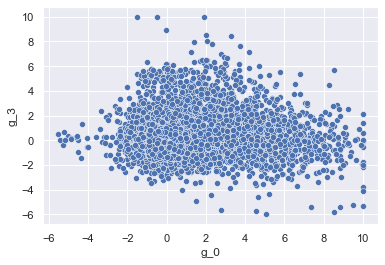

In [40]:
# Analisar a relação entre g_0 e g_3 ...(olhando como um todo, sem um filtro de composto ou de tratamento)
sns.scatterplot(x="g_0", y="g_3", data=dados)

# não tem padrão evidente, nem positivo nem negativo

<AxesSubplot:xlabel='g_0', ylabel='g_8'>

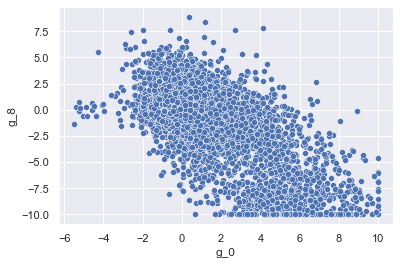

In [43]:
# A inclinação negativa: Quanti maior o G-0 menor o G-8
sns.scatterplot(x="g_0", y="g_8", data=dados)

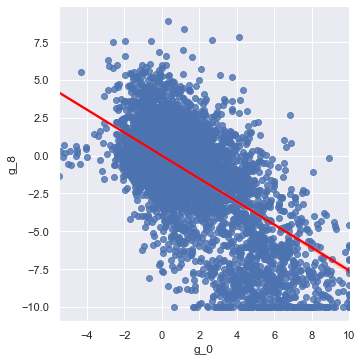

In [49]:
# Adiciona linha de tendencia (tendencia negativa)
sns.lmplot(x="g_0", y="g_8", data=dados, line_kws={"color": "red"})

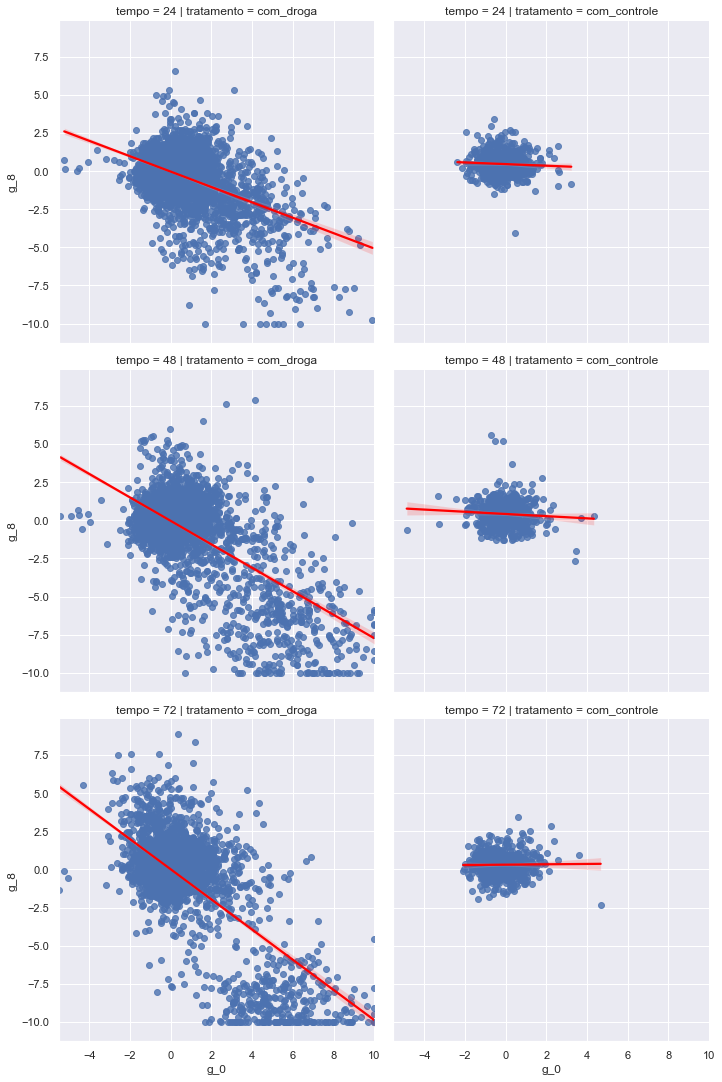

In [66]:
# Começar analisar a relação com alguns filtros aplicados para dar foco em um tratamento, dose, tempo...
sns.lmplot(data=dados, x="g_0", y="g_8", col="tratamento", row="tempo", line_kws={"color": "red"} )

#### Corelação não implica em causalidade:
Não podemos afirmar que um está afentando diretamente o outro. Pode ser que sim, mas também pode ser que não. Uma corelação pode ser uma causalidade, não necessáriamente o aumento de um tem a haver com aumento de outro, pode ser algo indireto, efetado por outro parametro mas que gerou esse padrão.

Ex:no caso desse exemplo. Os genes que naturalmente aumentam a expressão juntos, como os genes relacionados ao metabolismo, aumentam depois do almoço, não porque um influencia o outro, mas porque existe a necessidade de metabolizar o almoço naquele momento e isso é feito em conjunto por todos os genes.

https://www.tylervigen.com/spurious-correlations


In [53]:
# Calculando a correlação de todos os genes
# Para cada coluna, uma colação que varia de -1 a +1 sendo que valores negativos 
# indica que o aumento de um implica a redução do outro (inversamente relacionados)
# próximo 1 são proporcionalmente relacionados

dados.loc[:, "g_0":"g_771"].corr()

,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,...,g_762,g_763,g_764,g_765,g_766,g_767,g_768,g_769,g_770,g_771
g_0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g_1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g_2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g_3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g_4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g_767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
g_768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
g_769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
g_770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


<AxesSubplot:>

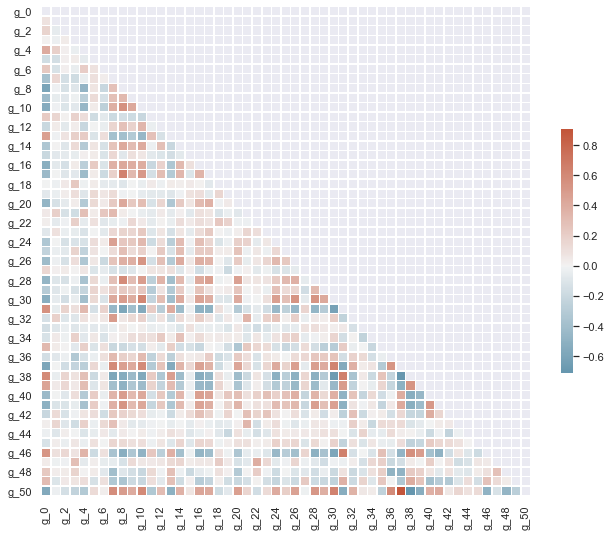

In [58]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    
import numpy as np
import matplotlib.pyplot as plt
# dados.loc[:, "g_0":"g_771"].corr()

# Compute the correlation matrix
corr = dados.loc[:, "g_0":"g_50"].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

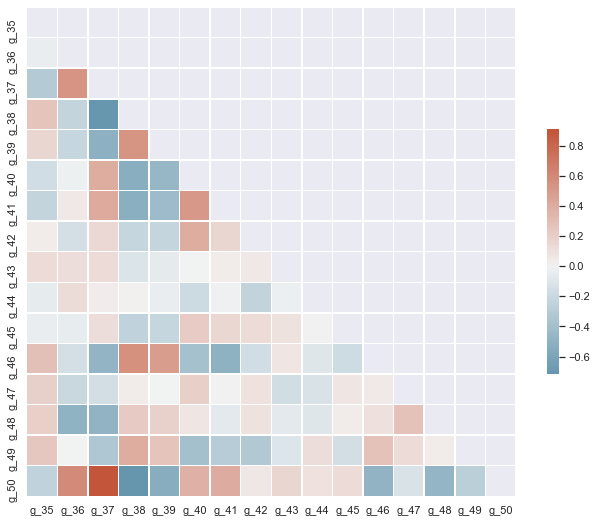

In [60]:
# Existe uma relação forte no g_50 com g_37
# Ajustar para ver uma janela menor
# Compute the correlation matrix
corr = dados.loc[:, "g_35":"g_50"].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

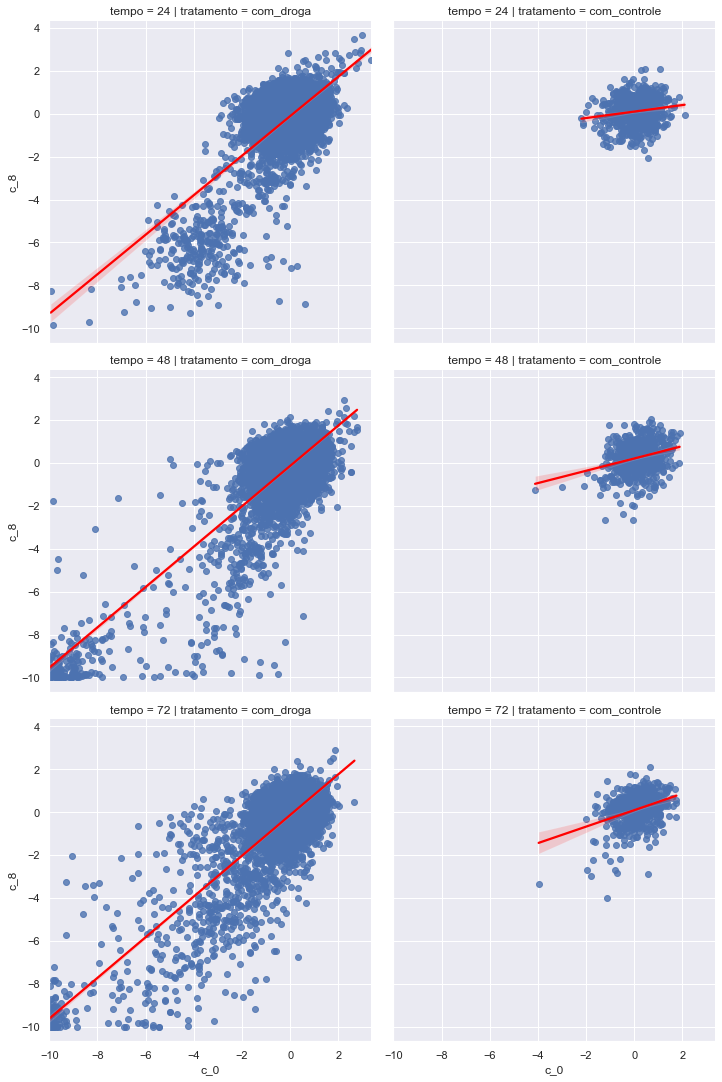

In [67]:
# Começar analisar a relação entre as celulas
sns.lmplot(data=dados, x="c_0", y="c_8", col="tratamento", row="tempo", line_kws={"color": "red"} )

# Alta correlação

<AxesSubplot:>

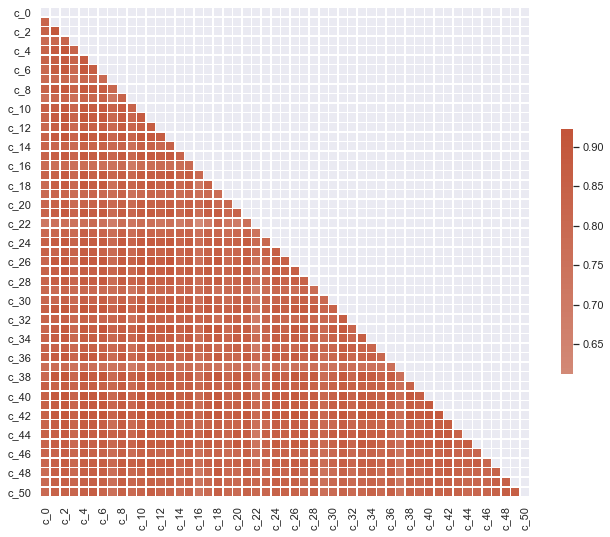

In [64]:
# Uma correlação alta é uma pista! mas não uma resposta
# Vamos analisar a correção das viabilidade celular (taxa de celulas que sobrevivem ao composto)

corr_celulas = dados.loc[:, "c_0":"c_50"].corr()
mask = np.triu(np.ones_like(corr_celulas, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_celulas, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})